In [1]:
import pandas
from scipy.io import loadmat
import numpy as np
import random
import scipy.optimize as optimize
import matplotlib.pyplot as pyplot

In [2]:
#Загрузите данные ex4data1.mat из файла.

data = loadmat('ex4data1.mat')
y = data["y"]
x = data["X"]
print(x.shape)
print(y)

(5000, 400)
[[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]


In [3]:
#Загрузите веса нейронной сети из файла ex4weights.mat, который содержит две матрицы Θ(1) (25, 401) и Θ(2) (10, 26). 
#Какова структура полученной нейронной сети?

weightsData = loadmat('ex4weights.mat')
theta1 = weightsData["Theta1"]
theta2 = weightsData["Theta2"]
print(theta1.shape)
print(theta2.shape)


(25, 401)
(10, 26)


In [4]:
#Реализуйте функцию прямого распространения с сигмоидом в качестве функции активации. 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def getSigmoidData(ones, x, theta):
    if x.shape[1] != theta.shape[1]:
        x = np.hstack((ones, x))
    z = np.dot(x, theta.T)
    return sigmoid(z)

def h(theta1, theta2, x):
    m = len(x)
    ones = np.ones((m, 1))
    x = getSigmoidData(ones, x, theta1)
    return x, getSigmoidData(ones, x, theta2)

l1, l2 = h(theta1, theta2, x)
print(l1.shape, l2.shape, x.shape)

((5000, 25), (5000, 10), (5000, 400))


In [5]:
#Вычислите процент правильных классификаций на обучающей выборке. 
#Сравните полученный результат с логистической регрессией.

def predictionPercentValue(resultLayer, y):
    predictions = np.argmax(resultLayer, axis=1) + 1
    predictionsCount = 0
    for predictionValue, realValue in zip(predictions, y):
        if predictionValue == realValue:
            predictionsCount += 1
    percentValue =  float(predictionsCount) / len(y) * 100
    return percentValue

predictionPercentValue(l2, y)

97.52

In [6]:
#Перекодируйте исходные метки классов по схеме one-hot.

oneHot = pandas.get_dummies(y.squeeze())
print(oneHot)

      1   2   3   4   5   6   7   8   9   10
0      0   0   0   0   0   0   0   0   0   1
1      0   0   0   0   0   0   0   0   0   1
2      0   0   0   0   0   0   0   0   0   1
3      0   0   0   0   0   0   0   0   0   1
4      0   0   0   0   0   0   0   0   0   1
5      0   0   0   0   0   0   0   0   0   1
6      0   0   0   0   0   0   0   0   0   1
7      0   0   0   0   0   0   0   0   0   1
8      0   0   0   0   0   0   0   0   0   1
9      0   0   0   0   0   0   0   0   0   1
10     0   0   0   0   0   0   0   0   0   1
11     0   0   0   0   0   0   0   0   0   1
12     0   0   0   0   0   0   0   0   0   1
13     0   0   0   0   0   0   0   0   0   1
14     0   0   0   0   0   0   0   0   0   1
15     0   0   0   0   0   0   0   0   0   1
16     0   0   0   0   0   0   0   0   0   1
17     0   0   0   0   0   0   0   0   0   1
18     0   0   0   0   0   0   0   0   0   1
19     0   0   0   0   0   0   0   0   0   1
20     0   0   0   0   0   0   0   0   0   1
21     0  

In [7]:
#Реализуйте функцию стоимости для данной нейронной сети.

def costFunction(h, y, sumParameter=False):
    costs = []
    for hI, yI in zip(h, y):
        cost = sum((hI - yI) ** 2)
        costs.append(cost)
    return sum(costs) if sumParameter == True else np.array(costs)

oneHot = np.array(oneHot)
cost = costFunction(l2, oneHot, sumParameter=True)
print(cost)

304.66188263


In [8]:
#Добавьте L2-регуляризацию в функцию стоимости.

def costFunctionL2(theta1, theta2, y, lmbda):
    l1, l2 = h(theta1, theta2, x)
    return sum(sum((l2 - y) ** 2) * lmbda / (2*len(y)))

lmbda = 10000
cost = costFunctionL2(theta1, theta2, oneHot, lmbda)
print(cost)

304.66188263


In [9]:
#Реализуйте функцию вычисления производной для функции активации.

def sigmoidDerivate(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)


In [10]:
#Инициализируйте веса небольшими случайными числами.

def generateWeights(shape):
    weights = []
    for i in range(shape[0]):
        line = []
        for j in range(shape[1]):
            value = random.random()
            line.append(value)
        weights.append(line)
    return np.array(weights)


shape1 = (25, 400)
weights1 = generateWeights(shape1)
shape2 = (10, 25)
weights2 = generateWeights(shape2)
print(weights1.shape)
print(weights2.shape)

(25, 400)
(10, 25)


In [12]:
#Реализуйте алгоритм обратного распространения ошибки для данной конфигурации сети.

for j in xrange(100):
    l0 = x
    l1, l2 = h(weights1, weights2, l0)
    l2error = y - l2
    if (j% 100) == 0:
        print "Error:" + str(np.mean(np.abs(l2error)))
    l2delta = l2error*sigmoidDerivate(l2)
    l1error = l2delta.dot(weights2)
    l1delta = l1error * sigmoidDerivate(l1)
    weights1 += np.dot(l0.T, l1delta).T
    weights2 += np.dot(l1.T, l2delta).T


Error:4.50000374063


In [13]:
#Для того, чтобы удостоверится в правильности вычисленных значений градиентов используйте метод проверки градиента 
#с параметром ε = 10-4.

def gradient(weights, x, lmbda=0, alpha=10e-4):
    weights1, weights2 = weights[0], weights[1]
    for j in xrange(100):
        layer1 = sigmoid(np.dot(x, weights1.T)) 
        layer2 = sigmoid(np.dot(layer1, weights2.T)) 
        layer2delta = (layer2 - y) * (layer2 * (1-layer2))
        layer1delta = np.dot(layer2delta, weights2) * (layer1 * (1-layer1)) 
        l2Parameter = 1 - lmbda/len(x)
        weights2 = weights2 * l2Parameter - alpha * np.dot(layer1.T, layer2delta).T 
        weights1 = weights1 * l2Parameter - alpha * np.dot(x.T, layer1delta).T 
    return np.array([weights1, weights2])

gradient([weights1, weights2], x)

array([ array([[  2.75772635e-02,   2.41585803e-01,   8.22843653e-01, ...,
         -3.92934072e+05,  -1.67928833e+04,   3.61228143e-01],
       [  1.67007877e-01,   3.62770148e-01,   3.09937043e-01, ...,
         -3.92933860e+05,  -1.67932571e+04,   9.58155979e-01],
       [  2.04490140e-01,   6.14716886e-01,   7.76438906e-01, ...,
         -3.92933923e+05,  -1.67932704e+04,   6.03752299e-01],
       ..., 
       [  6.00626102e-01,   7.04437896e-01,   9.46528125e-02, ...,
         -3.92933811e+05,  -1.67932426e+04,   3.86372381e-01],
       [  1.30004599e-01,   2.89356136e-01,   4.40424494e-01, ...,
         -3.92934286e+05,  -1.67928472e+04,   9.31201830e-02],
       [  4.98604892e-01,   9.73386804e-01,   5.23055320e-01, ...,
         -3.92934141e+05,  -1.67927031e+04,   9.97171280e-01]]),
       array([[ 442377.77623476,  442377.84030592,  442377.02615889,
         442377.11351097,  442377.65024269,  442377.16758929,
         442377.51382038,  442377.39390759,  442377.26997166,
    

In [14]:
#Добавьте L2-регуляризацию в процесс вычисления градиентов.

weights = gradient([weights1, weights2], x, 1)
weights1, weights2 = weights[0], weights[1]

In [15]:
#Проверьте полученные значения градиента.

l1, l2 = h(weights1, weights2, x)
print(l1.shape, l2.shape, x.shape)

((5000, 25), (5000, 10), (5000, 400))


In [16]:
#Обучите нейронную сеть с использованием градиентного спуска или других более эффективных методов оптимизации.

y = data["y"]
x = data["X"]
trainWeights1 = generateWeights((25, 400))
trainWeights2 = generateWeights((10, 25))
trainWeights = gradient([trainWeights1, trainWeights2], x, 0.0000001)
trainWeights1, trainWeights2 = trainWeights[0], trainWeights[1]
l1, l2 = h(trainWeights1, trainWeights2, x)

In [22]:
l1, l2 = h(theta1, theta2, x)

In [18]:
#Вычислите процент правильных классификаций на обучающей выборке.

predictionPercentValue(l2, y)

10.0

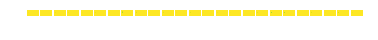

In [19]:
#Визуализируйте скрытый слой обученной сети.

def plotL1(l1):
    count = 25
    _, axis = pyplot.subplots(1, count)

    for j in range(count):
        matrix = l1.T[j].reshape(50, 100, order="F")
        axis[j].imshow(matrix)
        axis[j].axis("off")

    pyplot.show()
    
plotL1(l1)


100000000


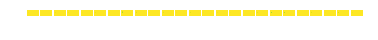

1000


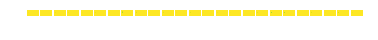

0


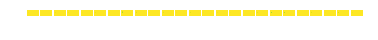

1e-05


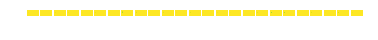

In [20]:
#Подберите параметр регуляризации. Как меняются изображения на скрытом слое в зависимости от данного параметра?

lmbdas = [100000000, 1000, 0, 0.00001]

for lmbda in lmbdas:
    trainWeights = gradient([trainWeights1, trainWeights2], x, 0.0000001)
    trainWeights1, trainWeights2 = trainWeights[0], trainWeights[1]
    l1, l2 = h(trainWeights1, trainWeights2, x)
    print(lmbda)
    plotL1(l1)


In [21]:
#Ответы на вопросы представьте в виде отчета.